#### FASE 4. Análisis de los datos del DataFrame

##### CASO HIPOTÉTICO: Una productora de Reino Unido quiere producir series, y quiere saber: 1) qué tipo de series (en cuanto a categoría, tipo de público y género) son las que más se han producido en el último milenio en su país, y 2) qué tipo de serie es la que mejor valora el público. 

Es decir, tengo que averiguar qué características son las que suelen tener las series mejor valoradas (tomando como referencia la puntuación de IMDb), consultando para ello los datos de series producidas en Reino Unido, del año 2000 en adelante.

### Cargo los recursos necesarios

Importo las librerías que voy a utilizar

In [2]:
#Para poder importar mi DataFrame
import pandas as pd

#Para hacer los gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Establezco el estilo de matplotlib y defino que sea para gráficos estáticos

In [3]:
plt.style.use('ggplot')

%matplotlib inline      

Importo mi DataFrame y lo filtro para quedarme solo con aquellas series que han recibido 5000 votos o más en IMDb. Es decir, series mínimamente conocidas y donde la puntuación en IMDb sea fruto de un consenso.

In [4]:
#Importo mi DataFrame
mi_df_analizar = pd.read_csv("mi_df_series_limpio.csv")

#Lo filtro por medio de una máscara
mask_filtro_votaciones = (mi_df_analizar["Número de votaciones"] >= 5000)
mi_df_analizar = mi_df_analizar[mask_filtro_votaciones]

#Compruebo que se ha hecho bien
mi_df_analizar

ID                                             Título  \
0      tt7767422                                      Sex Education   
1      tt1888075                               Crimen en el paraíso   
2     tt11737520                                          One Piece   
3     tt10590066             Todas las criaturas grandes y pequeñas   
4      tt8594324                                          Fantasmas   
...          ...                                                ...   
1651   tt8201186                                        The Capture   
1652   tt1186356                                        Whitechapel   
1655  tt14829590  Agatha Christie: ¿Por qué no le preguntan a Ev...   
1657   tt9788012                                             Traces   
1665   tt7660730                                 Black Earth Rising   

     Categoría de serie Calificación por edad  Año de lanzamiento  \
0           Serie de TV               Adultos                2019   
1           Serie de TV    Todos los públicos                2011   
2           Serie de TV          Adolescentes                2023   
3           Serie de TV    Todos los públicos                2020   
4           Serie de TV    Todos los públicos                2019   
...                 ...                   ...                 ...   
1651        Serie de TV          Adolescentes                2019   
1652        Serie de TV          Adolescentes                2009   
1655    Miniserie de TV               Adultos                2022   
1657        Serie de TV               Adultos                2019   
1665        Serie de TV               Adultos                2018   

      Año de finalización  Años en emisión  Número de episodios  \
0                    2023                4                   32   
1                    2024               13                  102   
2                    2024                1                    9   
3                    2024                4                   28   
4                    2023                4                   35   
...                   ...              ...                  ...   
1651                 2024                5                   14   
1652                 2013                4                   18   
1655                 2022                0                    3   
1657                 2022                3                   12   
1665                 2018                0                    8   

      Puntuación en IMDb Año de lanzamiento_5 años Grupos de años en emisión  \
0                    8.3            De 2015 a 2019                  3-4 años   
1                    7.8            De 2010 a 2014                10-19 años   
2                    8.4            De 2020 a 2024                     1 año   
3                    8.6            De 2020 a 2024                  3-4 años   
4                    8.4            De 2015 a 2019                  3-4 años   
...                  ...                       ...                       ...   
1651                 7.9            De 2015 a 2019                  5-9 años   
1652                 7.8            De 2005 a 2009                  3-4 años   
1655                 7.1            De 2020 a 2024                    0 años   
1657                 7.0            De 2015 a 2019                  3-4 años   
1665                 7.5            De 2015 a 2019                    0 años   

          Grupo de episodios  Duración en minutos  Número de votaciones  \
0        Más de 18 episodios                 50.0                343000   
1        Más de 18 episodios                 60.0                 26000   
2     Entre 9 y 18 episodios                 60.0                138000   
3        Más de 18 episodios                  NaN                 16000   
4        Más de 18 episodios                 30.0                 25000   
...                      ...                  ...                   ...   
1651  Entre 9 y 18 episodios             

### Hago un análisis univariante de frecuencias para responder a la primera pregunta (i. e. qué tipo de series son las que más se han producido en los últimos 23 años)

### 1) Puntuación en IMDb

Las series con 5000 votos o más suelen tener una puntuación en IMDb comprendida entre el 7-8

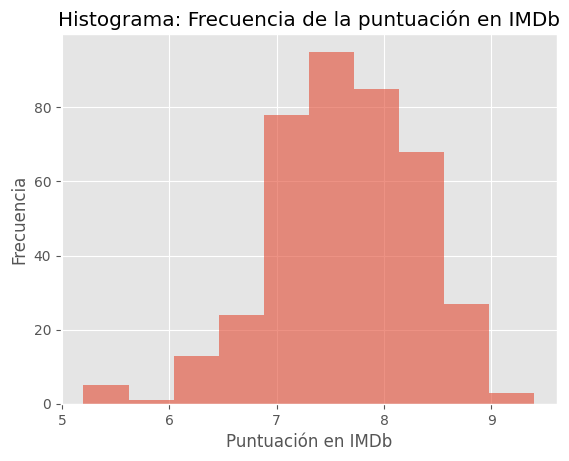

In [5]:
plt.hist(mi_df_analizar['Puntuación en IMDb'], alpha = 0.6)

plt.xlabel("Puntuación en IMDb")
plt.ylabel("Frecuencia")
plt.title("Histograma: Frecuencia de la puntuación en IMDb")

plt.show()

### 2) Categoría de serie: serie vs miniserie

Se puede apreciar que desde el 2000 en adelante se han producido más series de TV que miniseries

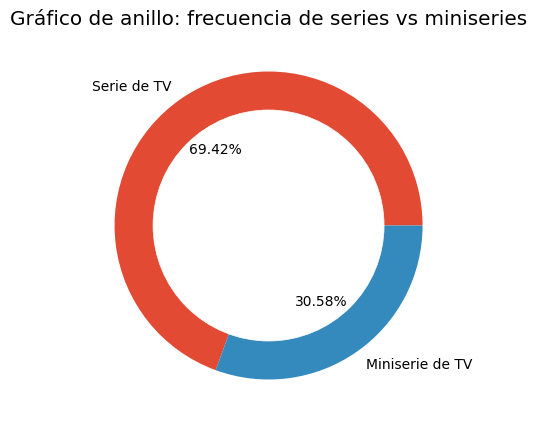

In [6]:
#Establezco los datos y la figura
datos = mi_df_analizar["Categoría de serie"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(datos.values, labels = datos.index, autopct = '%1.2f%%', wedgeprops=dict(width=0.8))

#Defino el círculo blanco del centro
circulo = plt.Circle((0,0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(circulo)

#Le doy un título y lo muestro
plt.title('Gráfico de anillo: frecuencia de series vs miniseries')

plt.show()

### 3) Calificación por edad: series para todos los públicos, para adolescentes vs para adultos

En general, vemos que se han producido más series dirigidas a adultos

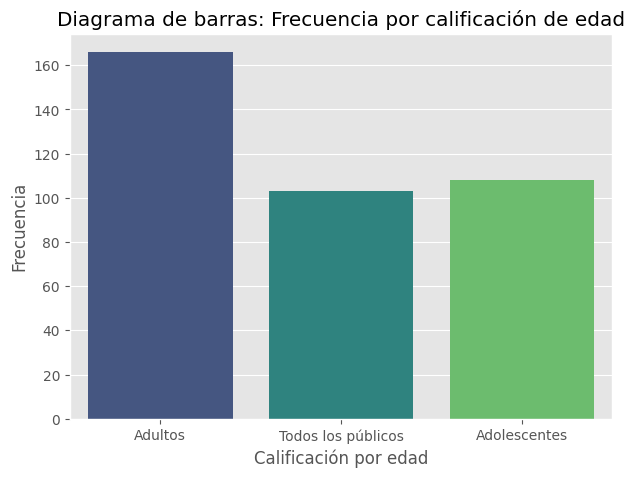

In [7]:
plt.figure(figsize= (7,5))

sns.countplot(x = mi_df_analizar["Calificación por edad"], palette = 'viridis', hue = mi_df_analizar["Calificación por edad"], legend = False)

plt.title('Diagrama de barras: Frecuencia por calificación de edad')
plt.xlabel('Calificación por edad')
plt.ylabel('Frecuencia')

plt.show()

### 4) Género de la serie: drama vs comedia vs suspense

De las series que han recibido 5000 votos o más, la gran mayoría son de drama, seguido de comedia y menor medida, de suspense

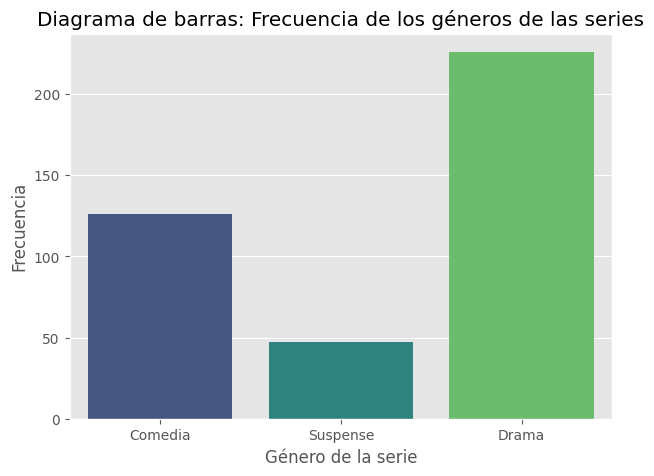

In [8]:
plt.figure(figsize= (7,5))

sns.countplot(x = mi_df_analizar["Género de la serie"], palette = 'viridis', hue = mi_df_analizar["Género de la serie"], legend = False)

plt.title('Diagrama de barras: Frecuencia de los géneros de las series')
plt.xlabel('Género de la serie')
plt.ylabel('Frecuencia')

plt.show()

##### **En base a estas observaciones, podemos concluir que las series que más se han producido a lo largo de estos 23 años han sido series, de género drama y dirigidas a adultos.**

### Ahora hago análisis bivariante para ver cómo se comporta cada variable en relación con la puntuación en IMDb, y así poder responder a la segunda pregunta (i.e. qué tipo de serie es la que mejor valora el público)

### 1) Categoría de la serie y puntuación en IMDb

En general, vemos que las series suelen tener una mejor puntuación que las miniseries, si bien la diferencia entre ellas no es muy grande.

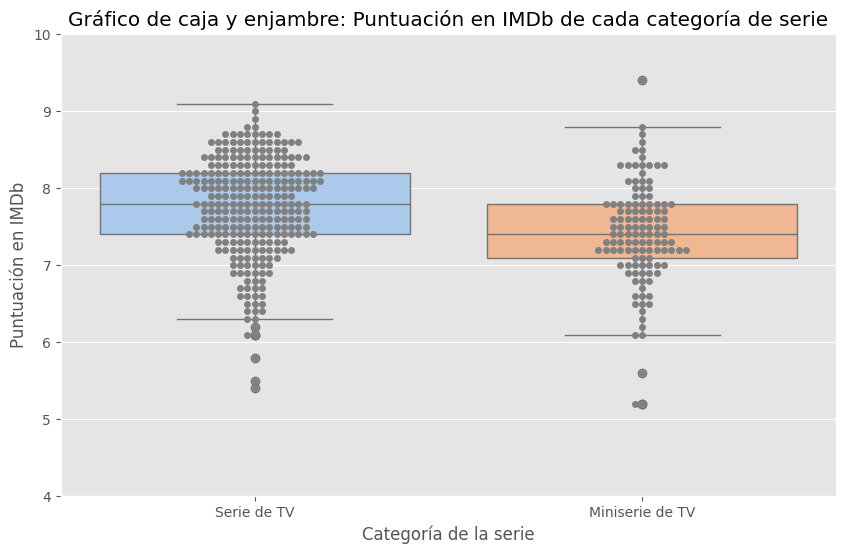

In [18]:
#Creo mi figura y mis gráficos de caja y de enjambre
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Categoría de serie', y = 'Puntuación en IMDb', data = mi_df_analizar, palette = 'pastel', hue = 'Categoría de serie')
sns.swarmplot(x = 'Categoría de serie', y = 'Puntuación en IMDb', data = mi_df_analizar, color = 'gray')

#Etiqueto los ejes y el axe para facilitar su entendimiento
plt.ylim(4, 10)
plt.xlabel('Categoría de la serie')
plt.ylabel('Puntuación en IMDb')
plt.title('Gráfico de caja y enjambre: Puntuación en IMDb de cada categoría de serie')

plt.show()


Pero si comparamos ambas categorías en base al número de votaciones que reciben, vemos que las más populares son las series

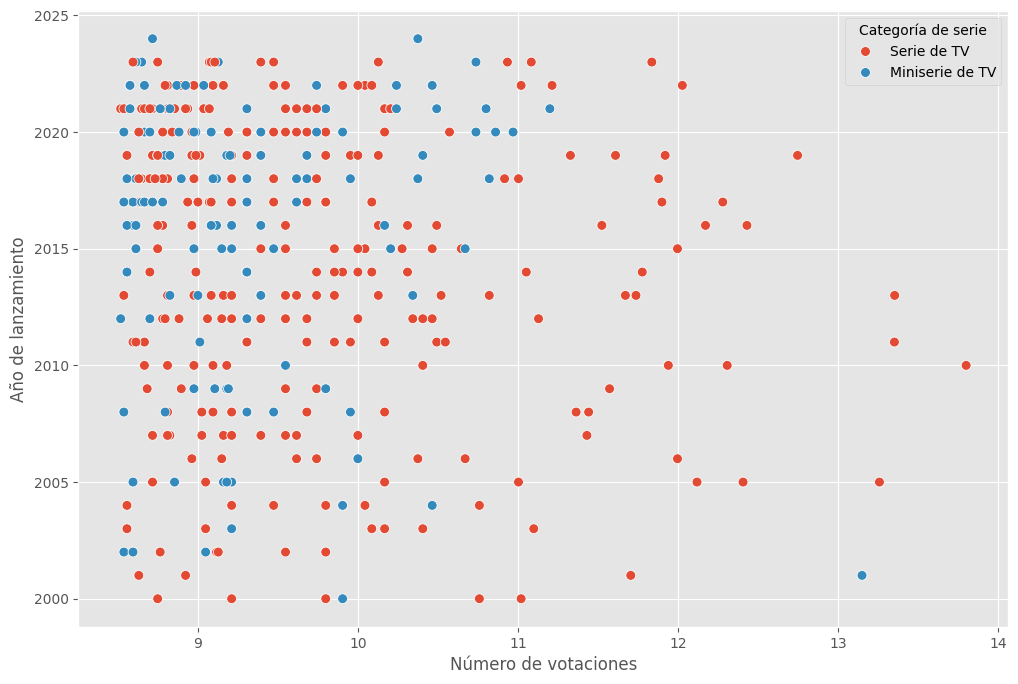

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = np.log(mi_df_analizar["Número de votaciones"]),
y = mi_df_analizar["Año de lanzamiento"],
s = 50,
hue = mi_df_analizar["Categoría de serie"]); 

### 2) Calificación por edad y puntuación en IMDb

En general, vemos que las series que obtienen una mejor puntuación son aquellas para mayores de 16 años (las de adolescentes) y aquellas para todos los públicos. Las series para mayores de 16 es más probable que alcancen una mayor puntuación, aunque también menor, porque su variabilidad es grande. Las peor valoradas serían las series dirigidas a adultos o a mayores de 18 años, aunque de nuevo las diferencias no son muy grandes.

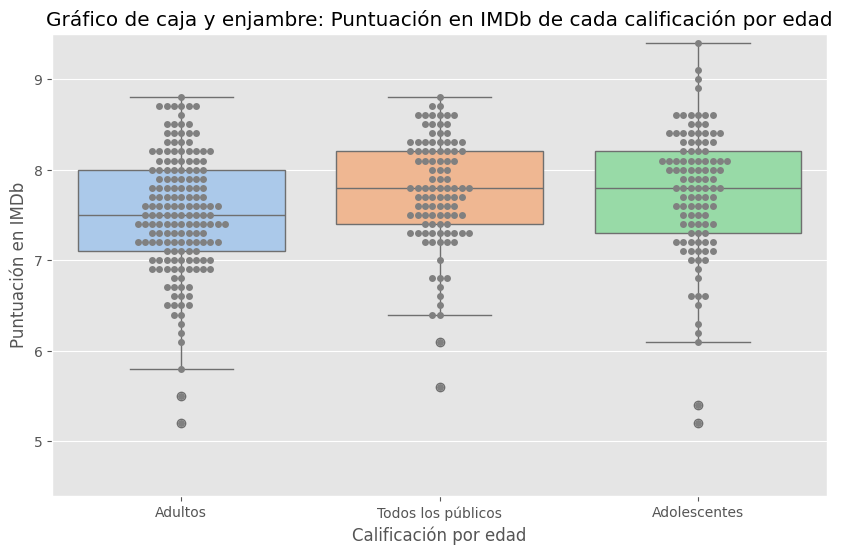

In [11]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Calificación por edad', y = 'Puntuación en IMDb', data = mi_df_analizar, palette = 'pastel', hue = 'Calificación por edad', legend = False)
sns.swarmplot(x = 'Calificación por edad', y = 'Puntuación en IMDb', data = mi_df_analizar, color = 'gray')

plt.ylim(4.4, 9.5)
plt.xlabel('Calificación por edad')
plt.ylabel('Puntuación en IMDb')
plt.title('Gráfico de caja y enjambre: Puntuación en IMDb de cada calificación por edad')

plt.show()

### 3) Género de la serie y puntuación en IMDb

En general, las series de comedia suelen recibir una puntuación superior en IMDb (más cercana al 8) y su puntuación mínima es más alta que las otras dos. Drama y suspense tienen una mediana similar, pero drama tiene más variabilidad hacia puntuaciones bajas y altas.

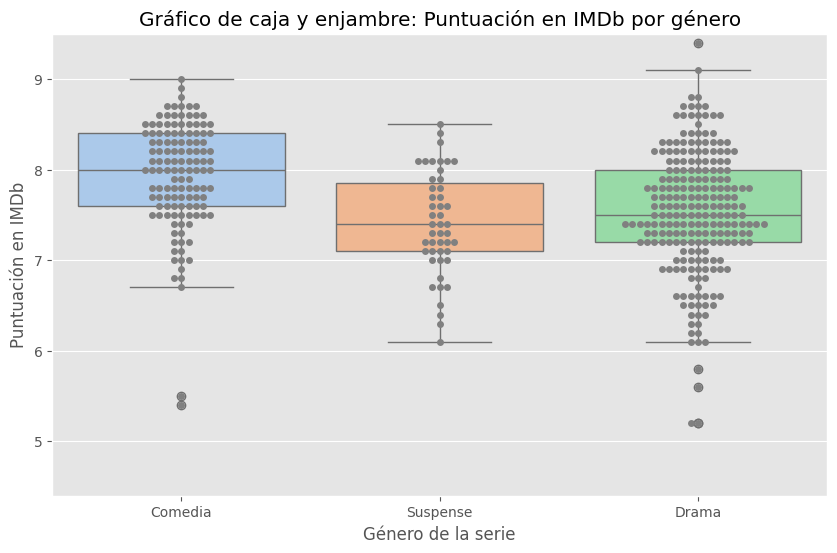

In [12]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Género de la serie', y = 'Puntuación en IMDb', data = mi_df_analizar, palette = 'pastel', hue = 'Género de la serie')
sns.swarmplot(x = 'Género de la serie', y = 'Puntuación en IMDb', data = mi_df_analizar, color = 'gray')

plt.ylim(4.4, 9.5)
plt.xlabel('Género de la serie')
plt.ylabel('Puntuación en IMDb')
plt.title('Gráfico de caja y enjambre: Puntuación en IMDb por género');


### 5) Correlaciones dos a dos entre las variables cuantitativas

In [13]:
#Me creo un DataFrame que es copia del anterior, pero únicamente con variables cualitativas

mi_df_cuan = mi_df_analizar.copy()

mi_df_cuan = mi_df_cuan.drop(["ID", "Título", "Categoría de serie", "Calificación por edad", "Año de lanzamiento_5 años", "Grupos de años en emisión", "Grupo de episodios", "Género de la serie", "Duración en minutos"], axis=1)

mi_df_cuan.head()


Año de lanzamiento  Año de finalización  Años en emisión  \
0                2019                 2023                4   
1                2011                 2024               13   
2                2023                 2024                1   
3                2020                 2024                4   
4                2019                 2023                4   

   Número de episodios  Puntuación en IMDb  Número de votaciones  
0                   32                 8.3                343000  
1                  102                 7.8                 26000  
2                    9                 8.4                138000  
3                   28                 8.6                 16000  
4                   35                 8.4                 25000

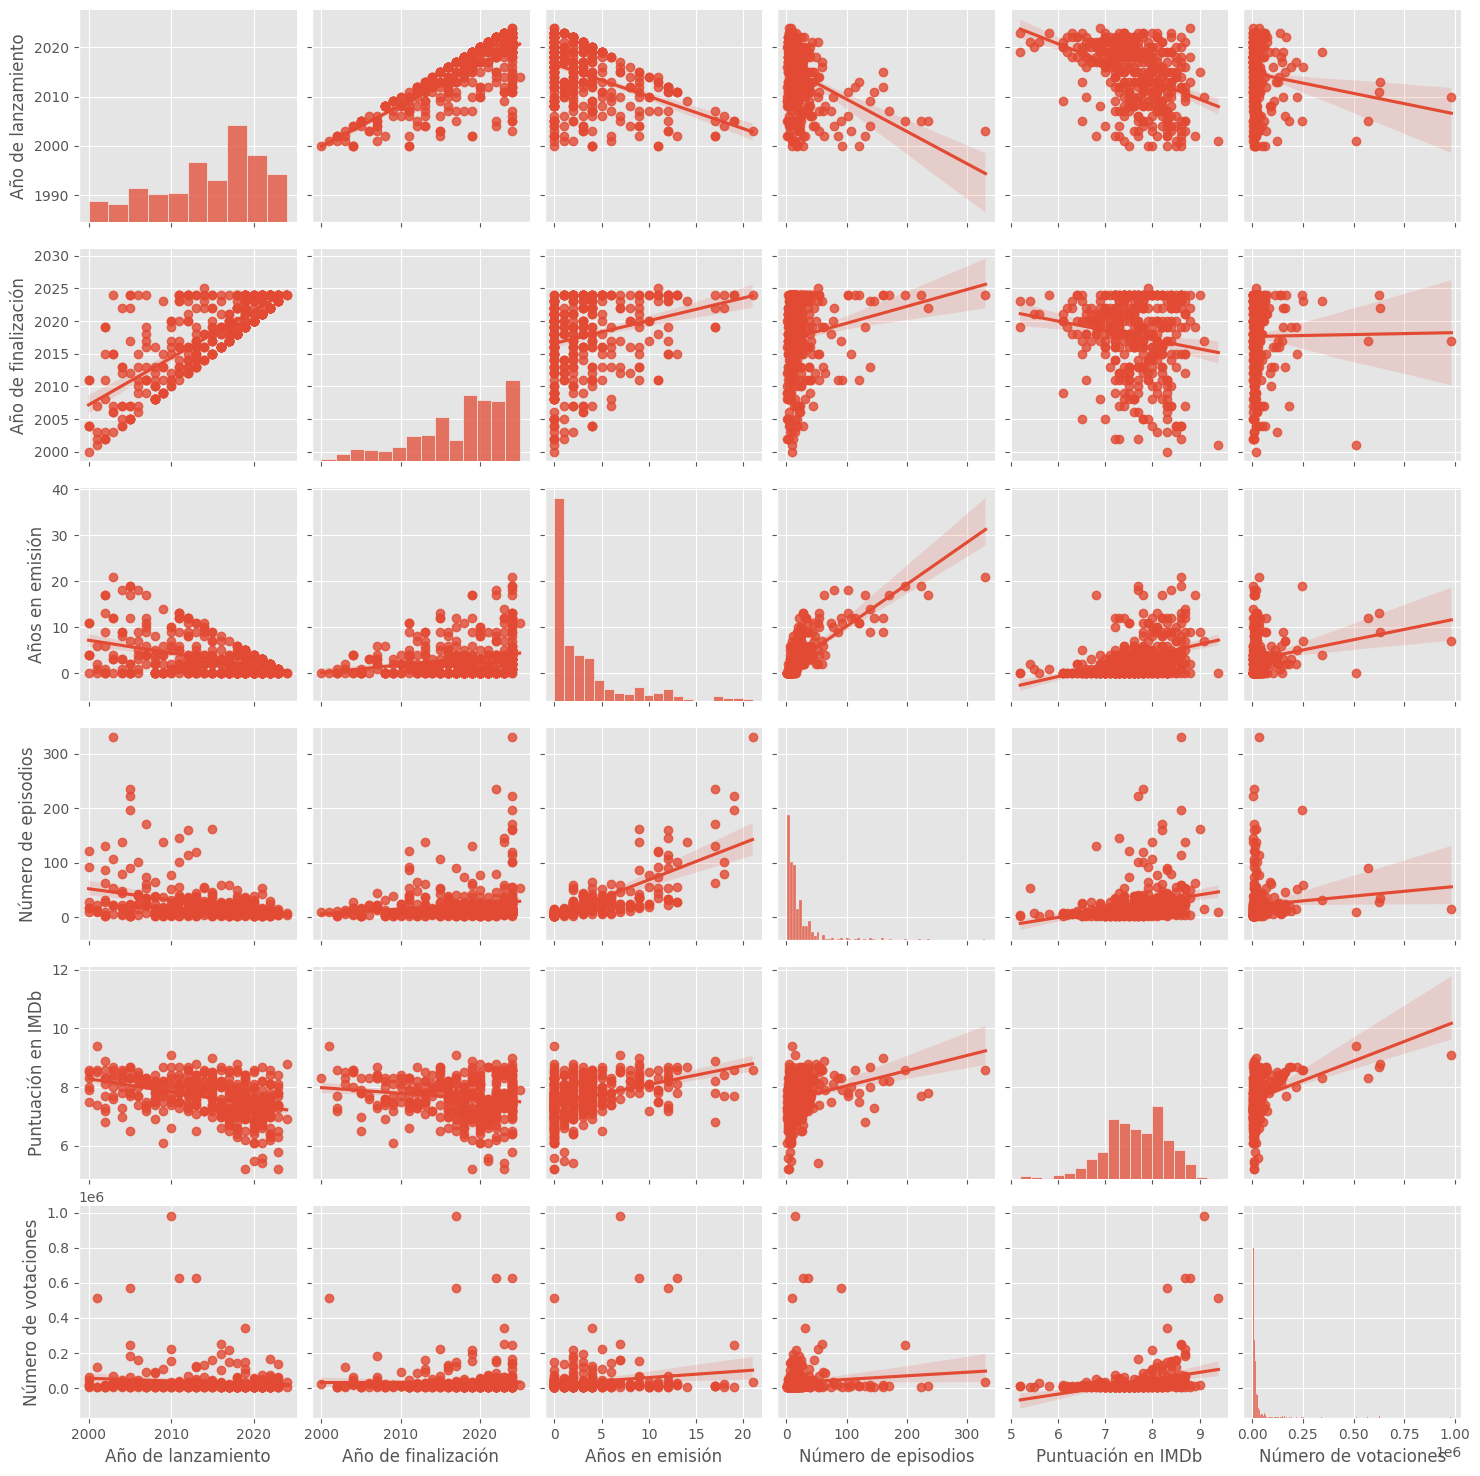

In [14]:
sns.pairplot(mi_df_cuan, kind = "reg")

Saco de forma individual aquellos gráficos que me han parecido más interesantes

#### 5a) Año de lanzamiento y puntuación en IMDb

Se observa cómo a medida que pasa el tiempo, se han lanzado y finalizado cada vez más series, y la puntuación de las series es cada vez menor

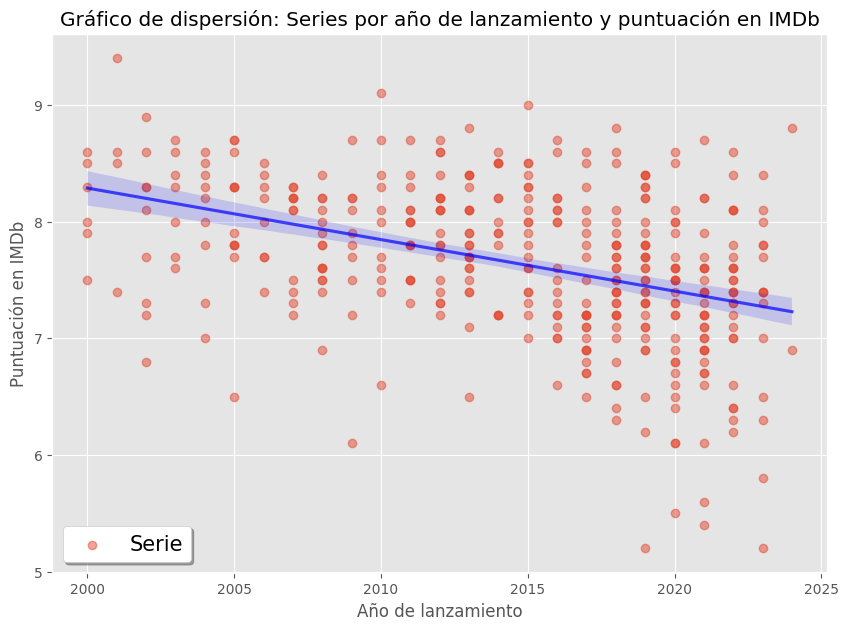

In [15]:
x = mi_df_analizar['Año de lanzamiento']
y = mi_df_analizar['Puntuación en IMDb']

plt.figure(figsize=(10, 7))

# Crear un gráfico de dispersión con una línea de regresión lineal
sns.regplot(x = x, y = y, scatter_kws = {'alpha': 0.5}, line_kws = {'color': 'blue', 'alpha': 0.7})

plt.title("Gráfico de dispersión: Series por año de lanzamiento y puntuación en IMDb")
plt.xlabel('Año de lanzamiento')
plt.ylabel('Puntuación en IMDb')

# No es necesario usar plt.plot para los puntos individuales si estás usando sns.regplot
# plt.plot(x, y, 'bo', label="Series", alpha=0.5)

# Personalizar la leyenda para el gráfico de dispersión
plt.legend(['Serie'], loc = 'lower left', frameon = True, fontsize = '15', shadow = True, facecolor = "white");



#### 5b) Año de finalización y puntuación en IMDb

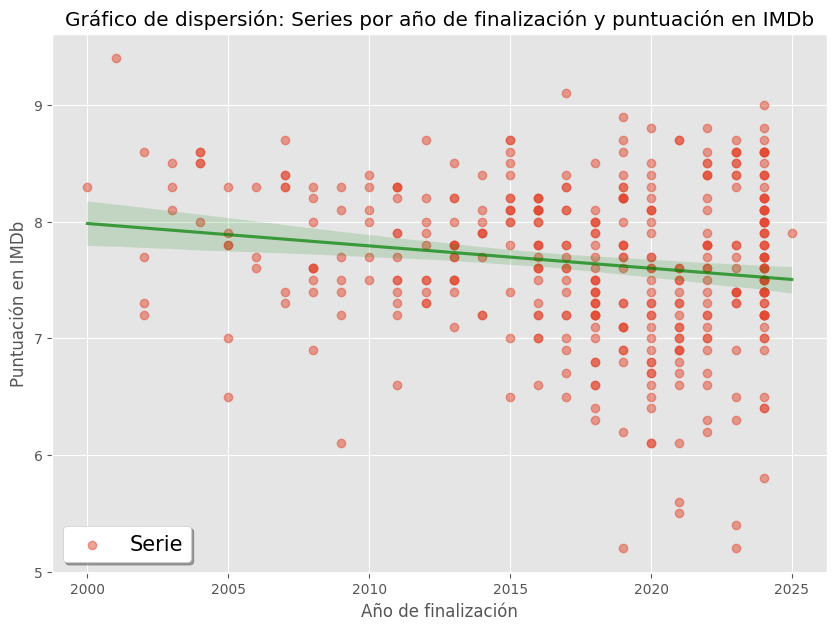

In [16]:
x = mi_df_analizar['Año de finalización']
y = mi_df_analizar['Puntuación en IMDb']

plt.figure(figsize=(10, 7))

# Crear un gráfico de dispersión con una línea de regresión lineal
sns.regplot(x = x, y = y, scatter_kws = {'alpha': 0.5}, line_kws = {'color': 'green', 'alpha': 0.7})

plt.title("Gráfico de dispersión: Series por año de finalización y puntuación en IMDb")
plt.xlabel('Año de finalización')
plt.ylabel('Puntuación en IMDb')

# No es necesario usar plt.plot para los puntos individuales si estás usando sns.regplot
# plt.plot(x, y, 'bo', label="Series", alpha=0.5)

# Personalizar la leyenda para el gráfico de dispersión
plt.legend(['Serie'], loc = 'lower left', frameon = True, fontsize = '15', shadow = True, facecolor = "white");

### Tendencia de lanzamiento y finalización de series

En línea con lo anterior, parece haber habido una tendencia a lanzar y cancelar más series, si bien en los últimos 3 años la tendencia parece haber sido producir menos series

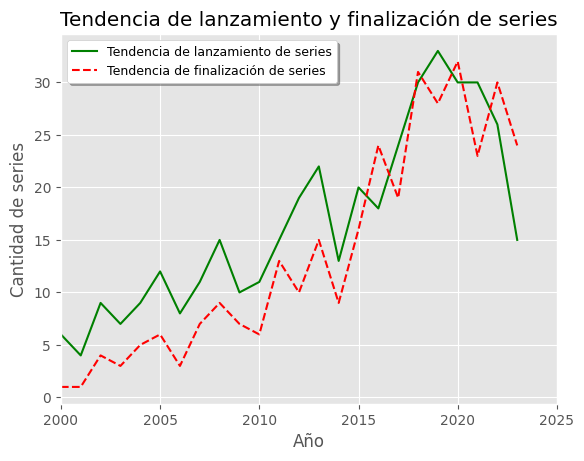

In [17]:
mi_df_analizar.astype({'Año de lanzamiento': 'int32'}).dtypes
anios_lanza = mi_df_analizar["Año de lanzamiento"].value_counts().sort_index(ascending = True)
anios_lanza = anios_lanza.iloc[:-1]   #No analizamos el 2024 ya que acaba de comenzar el año

mi_df_analizar.astype({'Año de finalización': 'int32'}).dtypes
anios_finaliz = mi_df_analizar["Año de finalización"].value_counts().sort_index(ascending = True)
anios_finaliz = anios_finaliz.iloc[:-2]  
#Como habíamos puesto que aquellas sin finalizar tuvieran el valor 2024, no las analizo para que no sea un outlier

plt.plot(anios_lanza.index, anios_lanza.values, '-g', label = 'Tendencia de lanzamiento de series')
plt.plot(anios_finaliz.index, anios_finaliz.values, '--r', label = 'Tendencia de finalización de series')

plt.xlim(2000, 2025)
plt.title("Tendencia de lanzamiento y finalización de series")
plt.xlabel("Año")
plt.ylabel("Cantidad de series")

#plt.grid(False)

plt.legend(loc = 'upper left', frameon = True, fontsize = '9', shadow = True, facecolor = "white");


##### **En base a estas observaciones, podemos concluir que las series que han sido mejor valoradas por el público general, a lo largo de estos 23 años, han sido series, de género comedia y dirigidas a todos los públicos o a personas a partir de 12 años.**


**CONCLUSIONES: Con lo cual, la tendencia ha sido producir series dramáticas para adultos, pero lo más valorado son las series de comedia para todos los públicos o las aptas para mayores de 12 años**.